In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import warnings
warnings.simplefilter('ignore')

In [2]:
data_generator = ImageDataGenerator( rescale= 1./255 )
traingen = data_generator.flow_from_directory( 'myimg', target_size=(98,98),
                                              class_mode='sparse', seed=1 )

Found 32 images belonging to 2 classes.


In [6]:
traingen.class_indices

{'cat': 0, 'dog': 1}

In [3]:
x_train, y_train = traingen.next()

In [7]:
x_train.shape

(32, 98, 98, 3)

In [5]:
y_train

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [8]:
x_data = x_train.reshape( 32, -1)

In [9]:
x_data.shape

(32, 28812)

In [10]:
model = MLPClassifier( verbose=1 )
model.fit( x_data, y_train )

Iteration 1, loss = 0.84443502
Iteration 2, loss = 7.97150850
Iteration 3, loss = 7.84918575
Iteration 4, loss = 6.42065075
Iteration 5, loss = 7.12956300
Iteration 6, loss = 6.85469360
Iteration 7, loss = 5.97993977
Iteration 8, loss = 4.25327569
Iteration 9, loss = 2.06693865
Iteration 10, loss = 0.64580311
Iteration 11, loss = 2.24101769
Iteration 12, loss = 3.20189463
Iteration 13, loss = 3.43324295
Iteration 14, loss = 3.08630151
Iteration 15, loss = 2.26093426
Iteration 16, loss = 1.13231912
Iteration 17, loss = 0.57068675
Iteration 18, loss = 1.29675336
Iteration 19, loss = 1.85028226
Iteration 20, loss = 1.95576445
Iteration 21, loss = 1.65830079
Iteration 22, loss = 1.75514224
Iteration 23, loss = 0.51655998
Iteration 24, loss = 0.74758361
Iteration 25, loss = 1.20867897
Iteration 26, loss = 1.35207519
Iteration 27, loss = 1.14174023
Iteration 28, loss = 0.71474049
Iteration 29, loss = 0.45731053
Iteration 30, loss = 0.64842523
Iteration 31, loss = 0.89194204
Iteration 32, los

MLPClassifier(verbose=1)

In [11]:
model.score( x_data, y_train)

1.0

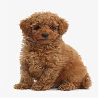

In [13]:
imgData = load_img( 'k.jpg', target_size=(98,98))
imgData

In [14]:
type(imgData)

PIL.Image.Image

In [16]:
testImg = img_to_array( imgData )/255

In [18]:
testImg.shape

(98, 98, 3)

In [19]:
model.predict( testImg.reshape(1,-1) )

array([0.], dtype=float32)

# 모델저장

In [20]:
import joblib

In [ ]:
# from sklearn.externals import joblib

In [21]:
joblib.dump( model, 'catdog.pkl' )

['catdog.pkl']

## 모델읽기

In [22]:
mymodel = joblib.load( 'catdog.pkl')

In [23]:
mymodel.predict( testImg.reshape(1,-1))

array([0.], dtype=float32)